# Import

In [ ]:
!pip install pyautogui

In [ ]:
!pip install category_encoders arff datasist kneed

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
# from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import BinaryEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datasist.structdata import detect_outliers
from sklearn.metrics import silhouette_score
from imblearn.under_sampling import TomekLinks
# from imblearn.pipeline import Pipelinge as imbPipeline
from imblearn.combine import SMOTETomek
import arff
from scipy.io import arff

# Load The Data

In [ ]:
data = arff.loadarff('Credit_Dataset.arff')

In [ ]:
df = pd.DataFrame(data[0])

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',12.0,b'existing paid',b'furniture/equipment',1736.0,b'<100',b'4<=X<7',3.0,b'female div/dep/mar',b'none',...,b'real estate',31.0,b'none',b'own',1.0,b'unskilled resident',1.0,b'none',b'yes',b'good'
996,b'<0',30.0,b'existing paid',b'used car',3857.0,b'<100',b'1<=X<4',4.0,b'male div/sep',b'none',...,b'life insurance',40.0,b'none',b'own',1.0,b'high qualif/self emp/mgmt',1.0,b'yes',b'yes',b'good'
997,b'no checking',12.0,b'existing paid',b'radio/tv',804.0,b'<100',b'>=7',4.0,b'male single',b'none',...,b'car',38.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'good'
998,b'<0',45.0,b'existing paid',b'radio/tv',1845.0,b'<100',b'1<=X<4',4.0,b'male single',b'none',...,b'no known property',23.0,b'none',b'for free',1.0,b'skilled',1.0,b'yes',b'yes',b'bad'


# Check The Data

In [ ]:
df['job'].value_counts()

b'skilled'                      630
b'unskilled resident'           200
b'high qualif/self emp/mgmt'    148
b'unemp/unskilled non res'       22
Name: job, dtype: int64

In [ ]:
df.drop('class', axis = 1, inplace  = True)

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',12.0,b'existing paid',b'furniture/equipment',1736.0,b'<100',b'4<=X<7',3.0,b'female div/dep/mar',b'none',...,b'real estate',31.0,b'none',b'own',1.0,b'unskilled resident',1.0,b'none',b'yes',b'good'
996,b'<0',30.0,b'existing paid',b'used car',3857.0,b'<100',b'1<=X<4',4.0,b'male div/sep',b'none',...,b'life insurance',40.0,b'none',b'own',1.0,b'high qualif/self emp/mgmt',1.0,b'yes',b'yes',b'good'
997,b'no checking',12.0,b'existing paid',b'radio/tv',804.0,b'<100',b'>=7',4.0,b'male single',b'none',...,b'car',38.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'good'
998,b'<0',45.0,b'existing paid',b'radio/tv',1845.0,b'<100',b'1<=X<4',4.0,b'male single',b'none',...,b'no known property',23.0,b'none',b'for free',1.0,b'skilled',1.0,b'yes',b'yes',b'bad'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.select_dtypes(include='number')

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0
...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0


In [ ]:
df.select_dtypes(include='object')

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,b'<0',b'critical/other existing credit',b'radio/tv',b'no known savings',b'>=7',b'male single',b'none',b'real estate',b'none',b'own',b'skilled',b'yes',b'yes',b'good'
1,b'0<=X<200',b'existing paid',b'radio/tv',b'<100',b'1<=X<4',b'female div/dep/mar',b'none',b'real estate',b'none',b'own',b'skilled',b'none',b'yes',b'bad'
2,b'no checking',b'critical/other existing credit',b'education',b'<100',b'4<=X<7',b'male single',b'none',b'real estate',b'none',b'own',b'unskilled resident',b'none',b'yes',b'good'
3,b'<0',b'existing paid',b'furniture/equipment',b'<100',b'4<=X<7',b'male single',b'guarantor',b'life insurance',b'none',b'for free',b'skilled',b'none',b'yes',b'good'
4,b'<0',b'delayed previously',b'new car',b'<100',b'1<=X<4',b'male single',b'none',b'no known property',b'none',b'for free',b'skilled',b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',b'existing paid',b'furniture/equipment',b'<100',b'4<=X<7',b'female div/dep/mar',b'none',b'real estate',b'none',b'own',b'unskilled resident',b'none',b'yes',b'good'
996,b'<0',b'existing paid',b'used car',b'<100',b'1<=X<4',b'male div/sep',b'none',b'life insurance',b'none',b'own',b'high qualif/self emp/mgmt',b'yes',b'yes',b'good'
997,b'no checking',b'existing paid',b'radio/tv',b'<100',b'>=7',b'male single',b'none',b'car',b'none',b'own',b'skilled',b'none',b'yes',b'good'
998,b'<0',b'existing paid',b'radio/tv',b'<100',b'1<=X<4',b'male single',b'none',b'no known property',b'none',b'for free',b'skilled',b'yes',b'yes',b'bad'


In [ ]:
df.select_dtypes(include='object')

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,b'<0',b'critical/other existing credit',b'radio/tv',b'no known savings',b'>=7',b'male single',b'none',b'real estate',b'none',b'own',b'skilled',b'yes',b'yes',b'good'
1,b'0<=X<200',b'existing paid',b'radio/tv',b'<100',b'1<=X<4',b'female div/dep/mar',b'none',b'real estate',b'none',b'own',b'skilled',b'none',b'yes',b'bad'
2,b'no checking',b'critical/other existing credit',b'education',b'<100',b'4<=X<7',b'male single',b'none',b'real estate',b'none',b'own',b'unskilled resident',b'none',b'yes',b'good'
3,b'<0',b'existing paid',b'furniture/equipment',b'<100',b'4<=X<7',b'male single',b'guarantor',b'life insurance',b'none',b'for free',b'skilled',b'none',b'yes',b'good'
4,b'<0',b'delayed previously',b'new car',b'<100',b'1<=X<4',b'male single',b'none',b'no known property',b'none',b'for free',b'skilled',b'none',b'yes',b'bad'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'no checking',b'existing paid',b'furniture/equipment',b'<100',b'4<=X<7',b'female div/dep/mar',b'none',b'real estate',b'none',b'own',b'unskilled resident',b'none',b'yes',b'good'
996,b'<0',b'existing paid',b'used car',b'<100',b'1<=X<4',b'male div/sep',b'none',b'life insurance',b'none',b'own',b'high qualif/self emp/mgmt',b'yes',b'yes',b'good'
997,b'no checking',b'existing paid',b'radio/tv',b'<100',b'>=7',b'male single',b'none',b'car',b'none',b'own',b'skilled',b'none',b'yes',b'good'
998,b'<0',b'existing paid',b'radio/tv',b'<100',b'1<=X<4',b'male single',b'none',b'no known property',b'none',b'for free',b'skilled',b'yes',b'yes',b'bad'


In [ ]:
def remove_b_and_quotes(cell):
    if isinstance(cell, bytes):
        cell = cell.decode('utf-8')
    return cell.replace("b'", '').replace("'", '')

In [ ]:
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].apply(remove_b_and_quotes)

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [ ]:
df["checking_status"] = df["checking_status"].astype(str)

In [ ]:
for col in df.select_dtypes(include = "object_").columns:
  df[col] = df[col].astype(str)

# Clustring

In [ ]:
px.histogram(data_frame=df, x= 'class')

In [ ]:
df.drop('class', axis = 1, inplace  = True)

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


## Clusters Models

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [ ]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.metrics import silhouette_score

In [ ]:
df['checking_status'].value_counts()


no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

In [ ]:
px.box(data_frame=df, x = 'credit_amount')

In [ ]:
for col in df.select_dtypes(include = "number").columns:
    fig = px.box(data_frame=df, x = col)
    fig.show()
    print(f"{col}")
    print(50 * "*")

duration
**************************************************


credit_amount
**************************************************


installment_commitment
**************************************************


residence_since
**************************************************


age
**************************************************


existing_credits
**************************************************


num_dependents
**************************************************


In [ ]:
df.select_dtypes(include = "number").columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

In [ ]:
df.select_dtypes(include = "object_").columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [ ]:
Encoder = ColumnTransformer(transformers=[("OHE",OneHotEncoder(sparse_output = False , drop ="first") , df.select_dtypes(include = "object_").columns)] , remainder = "passthrough")

In [ ]:
silhoute_stc = []
inertia_stc = []
k_values = range(2,10)
for k in k_values:
    steps = []
    steps.append(("encoder" ,Encoder))
    steps.append(("Scaler" , StandardScaler()))
    steps.append(("Km" , KMeans(n_clusters=k)))
    pipeline = Pipeline(steps=steps)
    pipeline.fit(df)
    inertia_stc.append(pipeline["Km"].inertia_)
    silhoute_stc.append(silhouette_score(pipeline[:2].fit_transform(df) , pipeline["Km"].labels_ ))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
silhoute_norm = []
inertia_norm = []
k_values = range(2,10)
for k in k_values:
    steps = []
    steps.append(("encoder" ,Encoder))
    steps.append(("Scaler" , MinMaxScaler()))
    steps.append(("Km" , KMeans(n_clusters=k)))
    pipeline = Pipeline(steps=steps)
    pipeline.fit(df)
    inertia_norm.append(pipeline["Km"].inertia_)
    silhoute_norm.append(silhouette_score(pipeline[:2].fit_transform(df) , pipeline["Km"].labels_ ))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
silhoute_rob = []
inertia_rob = []
k_values = range(2,10)
for k in k_values:
    steps = []
    steps.append(("encoder" ,Encoder))
    steps.append(("Scaler" , RobustScaler()))
    steps.append(("Km" , KMeans(n_clusters=k)))
    pipeline = Pipeline(steps=steps)
    pipeline.fit(df)
    inertia_rob.append(pipeline["Km"].inertia_)
    silhoute_rob.append(silhouette_score(pipeline[:2].fit_transform(df) , pipeline["Km"].labels_ ))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
px.line(x = k_values, y = [inertia_stc, inertia_norm, inertia_rob])

In [ ]:
# MinMax Scaler
px.line(x = k_values, y = [inertia_norm])

In [ ]:
from kneed import KneeLocator

In [ ]:
k1 = KneeLocator(k_values, inertia_norm, curve='convex', direction = 'decreasing')

In [ ]:
k1.elbow

5

In [ ]:
px.line(x = k_values, y = [silhoute_stc, silhoute_norm, silhoute_rob])

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
# scaler = StandardScaler()
# df_scaled = pd.DataFrame()
# df_scaled[df.columns] = scaler.fit(df.columns)


encoder = BinaryEncoder(cols=df.columns)

# Apply binary encoding to the specified columns
df_scaled = encoder.fit_transform(df)


In [ ]:
df_scaled

,checking_status_0,checking_status_1,checking_status_2,duration_0,duration_1,duration_2,duration_3,duration_4,duration_5,credit_history_0,...,existing_credits_2,job_0,job_1,job_2,num_dependents_0,num_dependents_1,own_telephone_0,own_telephone_1,foreign_worker_0,foreign_worker_1
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
4,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,0,0,0,0,1,1,0,...,0,0,1,0,0,1,1,0,0,1
996,0,0,1,0,0,0,1,1,1,0,...,0,0,1,1,0,1,0,1,0,1
997,0,1,1,0,0,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
998,0,0,1,0,0,1,1,1,0,0,...,0,0,0,1,0,1,0,1,0,1


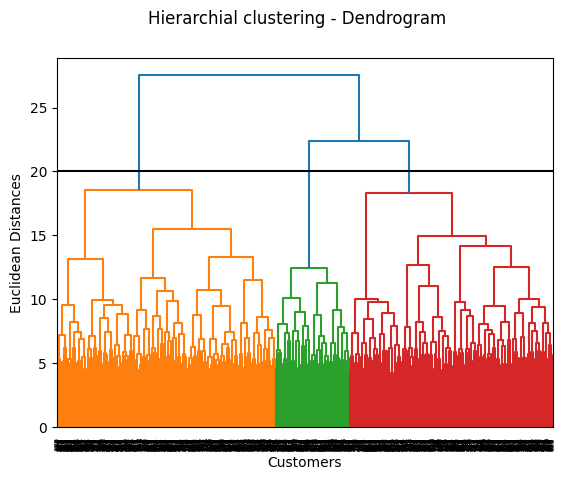

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(20, color = 'black')
plt.show()

In [ ]:
k1.all_elbows

{5}

In [ ]:
inertia_stc_hc = []
silhoute_stc_hc = []
k_values = range(2,10)
for k in k_values:
    steps = []
    steps.append(("encoder" ,Encoder))
    steps.append(("scaler", StandardScaler()))
    steps.append(("hc" , AgglomerativeClustering(n_clusters=k)))
    pipeline = Pipeline(steps=steps)
    pipeline.fit(df)
    #inertia_stc_hc.append(pipeline["hc"].inertia_)
    silhoute_stc_hc.append(silhouette_score(pipeline[:1].fit_transform(df), pipeline["hc"].labels_))

In [ ]:
inertia_norm_hc = []
silhoute_norm_hc = []
k_values = range(2,10)
for k in k_values:
    steps = []
    steps.append(("encoder" ,Encoder))
    steps.append(("scaler", MinMaxScaler()))
    steps.append(("hc" , AgglomerativeClustering(n_clusters=k)))
    pipeline = Pipeline(steps=steps)
    pipeline.fit(df)
    silhoute_norm_hc.append(silhouette_score(pipeline[:1].fit_transform(df), pipeline["hc"].labels_))

In [ ]:
inertia_norm_hc = []
silhoute_rob_hc = []
k_values = range(2,10)
for k in k_values:
    steps = []
    steps.append(("encoder" ,Encoder))
    steps.append(("scaler", RobustScaler()))
    steps.append(("hc" , AgglomerativeClustering(n_clusters=k)))
    pipeline = Pipeline(steps=steps)
    pipeline.fit(df)
    silhoute_rob_hc.append(silhouette_score(pipeline[:1].fit_transform(df), pipeline["hc"].labels_))

In [ ]:
px.line(x = k_values , y = [silhoute_stc_hc , silhoute_norm_hc , silhoute_rob_hc])

In [ ]:
px.line(x = k_values , y = silhoute_rob_hc )

In [ ]:
# Then the number of clusters is 3

In [ ]:
steps = []
steps.append(("encoder" ,Encoder))
steps.append(("scaler", RobustScaler()))
steps.append(("KM" , AgglomerativeClustering(n_clusters=3)))
pipeline = Pipeline(steps=steps)
pipeline.fit(df)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object'))])),
                ('scaler', RobustScaler()),
                ('KM', AgglomerativeClustering(n_clusters=3))])

In [ ]:
df["Cluster"] = pipeline["KM"].labels_

In [ ]:
df["Cluster"] = df["Cluster"].astype(str)

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,Cluster
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,2
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,1
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,2
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,0
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,0
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,0
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,0


In [ ]:
for col in df.select_dtypes(include = "number").columns:
  print(df[col].describe())
  print(col)
  print(50*'*')

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64
duration
**************************************************
count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64
credit_amount
**************************************************
count    1000.000000
mean        2.973000
std         1.118715
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: installment_commitment, dtype: float64
installment_commitment
**************************************************
count    1000.000000
mean        2.845000
std         1.103718
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: res

## Some Analysis Before the Cluster

In [ ]:
!pip install pio

In [ ]:
fig = px.histogram(df, x='checking_status', title='Checking Account Status Distribution')
fig.show()

In [ ]:
fig = px.histogram(df, x='duration', title='Credit Duration Distribution')
fig.show()


In [ ]:
fig = px.bar(df['credit_history'].value_counts().reset_index(), x='index', y='credit_history', title='Credit History Distribution')
fig.show()


In [ ]:
fig = px.bar(df['purpose'].value_counts().reset_index(), x='index', y='purpose', title='Purpose of Credit Distribution')
fig.show()

In [ ]:
fig = px.histogram(df, x='credit_amount', title='Credit Amount Distribution')
fig.show()

In [ ]:
fig = px.bar(df['savings_status'].value_counts().reset_index(), x='index', y='savings_status', title='Savings Status Distribution')
fig.show()

In [ ]:
fig = px.bar(df['employment'].value_counts().reset_index(), x='index', y='employment', title='Employment Duration Distribution')
fig.show()

In [ ]:
fig = px.histogram(df, x='installment_commitment', title='Installment Commitment Distribution')
fig.show()


In [ ]:
fig = px.bar(df['personal_status'].value_counts().reset_index(), x='index', y='personal_status', title='Personal Status Distribution')
fig.show()

In [ ]:
fig = px.bar(df['other_parties'].value_counts().reset_index(), x='index', y='other_parties', title='Other Parties Distribution')
fig.show()

In [ ]:
fig = px.histogram(df, x='residence_since', title='Residence Since Distribution')
fig.show()

In [ ]:
fig = px.bar(df['property_magnitude'].value_counts().reset_index(), x='index', y='property_magnitude', title='Property Magnitude Distribution')
fig.show()

In [ ]:
fig = px.histogram(df, x='age', title='Age Distribution')
fig.show()

In [ ]:
fig = px.bar(df['other_payment_plans'].value_counts().reset_index(), x='index', y='other_payment_plans', title='Other Payment Plans Distribution')
fig.show()

In [ ]:
fig = px.bar(df['housing'].value_counts().reset_index(), x='index', y='housing', title='Housing Distribution')
fig.show()

In [ ]:
fig = px.bar(df['existing_credits'].value_counts().reset_index(), x='index', y='existing_credits', title='Existing Credits Distribution')
fig.show()

In [ ]:
fig = px.bar(df['job'].value_counts().reset_index(), x='index', y='job', title='Job Distribution')
fig.show()

In [ ]:
fig = px.bar(df['num_dependents'].value_counts().reset_index(), x='index', y='num_dependents', title='Number of Dependents Distribution')
fig.show()

In [ ]:
fig = px.bar(df['own_telephone'].value_counts().reset_index(), x='index', y='own_telephone', title='Own Telephone Distribution')
fig.show()

In [ ]:
fig = px.bar(df['foreign_worker'].value_counts().reset_index(), x='index', y='foreign_worker', title='Foreign Worker Distribution')
fig.show()

## Some Cluster Analysis

In [ ]:
df['Cluster'].value_counts()

0    531
2    275
1    194
Name: Cluster, dtype: int64

In [ ]:
cluster0 = df[df['Cluster'] == '0'].sample(n=194)
cluster1 = df[df['Cluster'] == '1'].sample(n=194)
cluster2 = df[df['Cluster'] == '2'].sample(n=194)
merged_df = pd.concat([cluster0, cluster1, cluster2])
merged_df.reset_index(drop=True, inplace=True)

In [ ]:
fig = px.histogram(data_frame=df, x='checking_status', color='Cluster', facet_col='Cluster')

fig.show()

In [ ]:
cluster0 = df[df['Cluster'] == '0'].sample(n=100, replace=True)
cluster1 = df[df['Cluster'] == '1'].sample(n=100, replace=True)
cluster2 = df[df['Cluster'] == '2'].sample(n=100, replace=True)
merged_df = pd.concat([cluster0, cluster1, cluster2])
merged_df.reset_index(drop=True, inplace=True)
fig = px.histogram(data_frame=merged_df, x='checking_status', color='Cluster', facet_col='Cluster')

fig.show()

In [ ]:
# px.histogram(data_frame=df, x = 'employment')
fig = px.histogram(data_frame=df, x='employment', color='Cluster', facet_col='Cluster')

fig.show()

In [ ]:
# px.histogram(data_frame=df, x = 'employment')
fig = px.histogram(data_frame=merged_df, x='duration', color='Cluster', facet_col='Cluster')

fig.show()

In [ ]:
# px.histogram(data_frame=df, x = 'employment')
fig = px.histogram(data_frame=merged_df, x='employment', color='Cluster', facet_col='Cluster')

fig.show()

In [ ]:
df['credit_history'].value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

In [ ]:
# px.histogram(data_frame=df, x = 'employment')
fig = px.histogram(data_frame=merged_df, x='credit_history', color='Cluster', facet_col='Cluster')

fig.show()

In [ ]:
fig = px.histogram(data_frame=df, x='credit_history', color='Cluster', facet_col='Cluster')

fig.show()

In [ ]:
fig = px.histogram(data_frame=df, x='purpose', color='Cluster', facet_col='Cluster')

fig.show()

In [ ]:
fig = px.histogram(data_frame=merged_df, x='purpose', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)
fig.update_layout(title_text='Purpose Distribution by Cluster')

fig.show()

In [ ]:
fig = px.histogram(data_frame=df, x='credit_amount', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
df['credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

In [ ]:
fig = px.histogram(data_frame=merged_df, x='credit_amount', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
fig = px.ecdf(merged_df, x='credit_amount', color='Cluster')
fig.show()

In [ ]:

fig = px.histogram(data_frame=df, x='installment_commitment', color='Cluster', facet_col='Cluster')

fig.show()

In [ ]:
df.groupby('Cluster')['installment_commitment'].value_counts().reset_index

<bound method Series.reset_index of Cluster  installment_commitment
0        4.0                       280
         2.0                       105
         3.0                        87
         1.0                        59
1        2.0                        70
         4.0                        55
         1.0                        38
         3.0                        31
2        4.0                       141
         2.0                        56
         1.0                        39
         3.0                        39
Name: installment_commitment, dtype: int64>

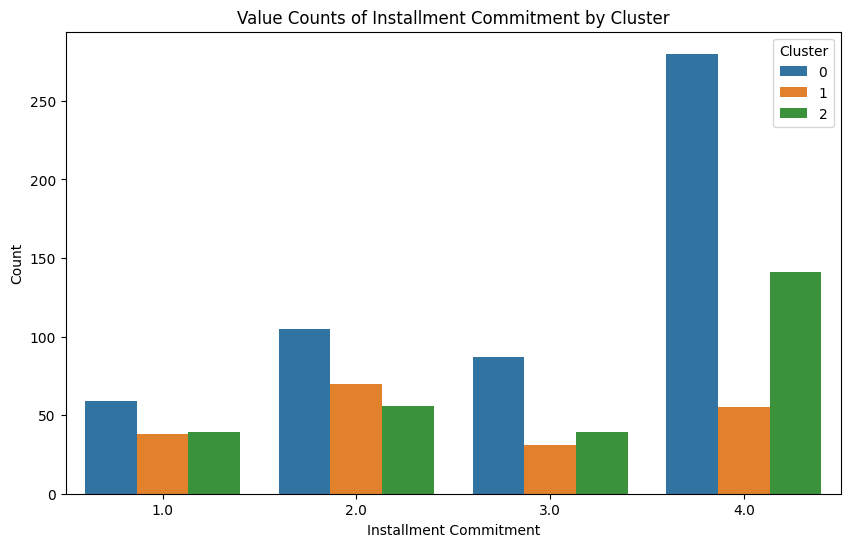

In [ ]:
value_counts = df.groupby('Cluster')['installment_commitment'].value_counts().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='installment_commitment', y='count', hue='Cluster', data=value_counts)

plt.xlabel('Installment Commitment')
plt.ylabel('Count')
plt.title('Value Counts of Installment Commitment by Cluster')

plt.legend(title='Cluster')
plt.show()

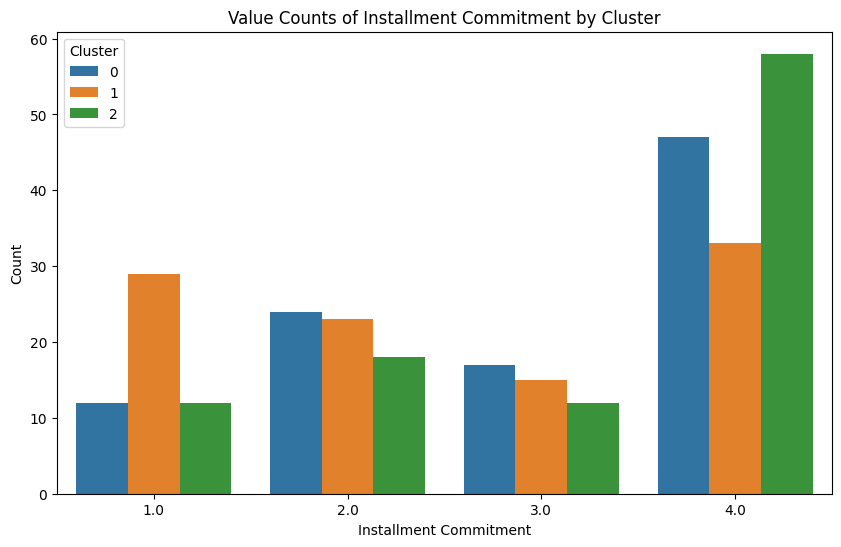

In [ ]:
value_counts = merged_df.groupby('Cluster')['installment_commitment'].value_counts().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='installment_commitment', y='count', hue='Cluster', data=value_counts)

plt.xlabel('Installment Commitment')
plt.ylabel('Count')
plt.title('Value Counts of Installment Commitment by Cluster')

plt.legend(title='Cluster')
plt.show()

In [ ]:
"""
Cluster 1 is more richer than the rest
"""

'\nCluster 1 is more richer than the rest, then Cluster 0 and Cluster 2\n'

In [ ]:
fig = px.histogram(data_frame=merged_df, x='personal_status', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
df['other_parties'].value_counts()

none            907
guarantor        52
co applicant     41
Name: other_parties, dtype: int64

In [ ]:
fig = px.histogram(data_frame=merged_df, x='residence_since', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

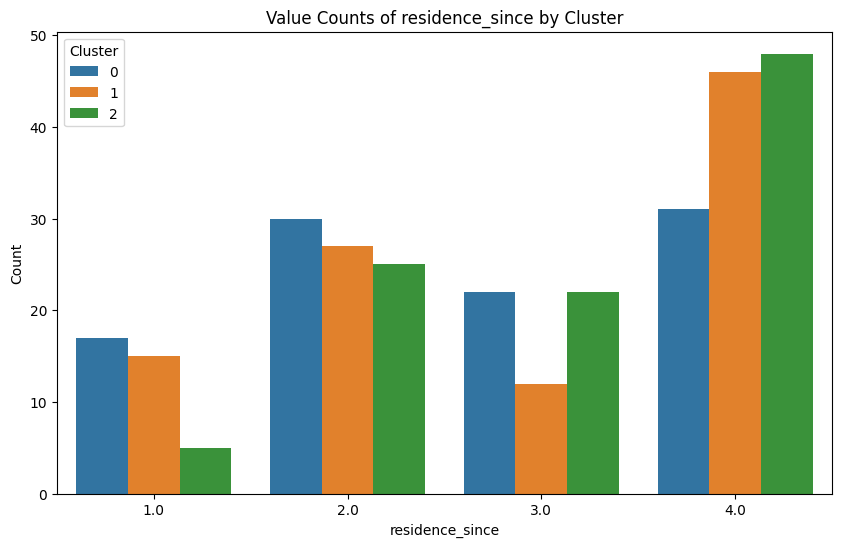

In [ ]:
value_counts = merged_df.groupby('Cluster')['residence_since'].value_counts().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='residence_since', y='count', hue='Cluster', data=value_counts)

plt.xlabel('residence_since')
plt.ylabel('Count')
plt.title('Value Counts of residence_since by Cluster')

plt.legend(title='Cluster')
plt.show()

In [ ]:
df['property_magnitude'].value_counts()

car                  332
real estate          282
life insurance       232
no known property    154
Name: property_magnitude, dtype: int64

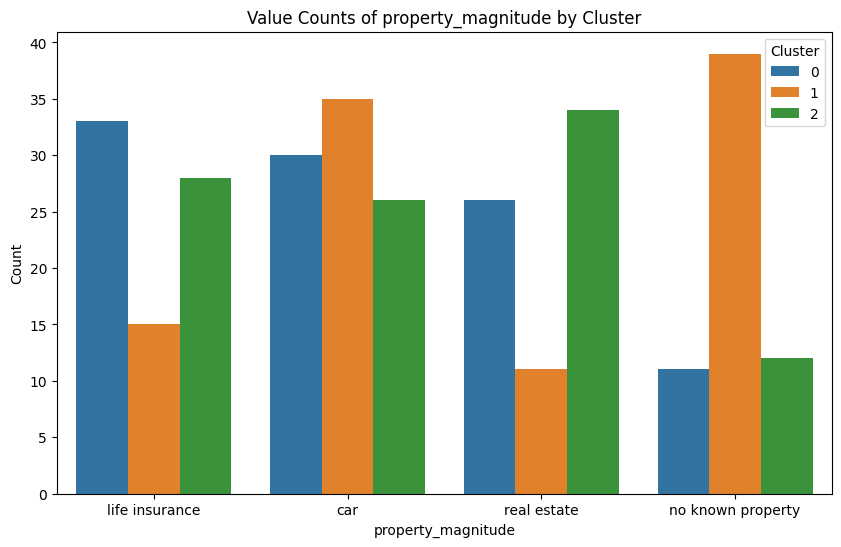

In [ ]:
value_counts = merged_df.groupby('Cluster')['property_magnitude'].value_counts().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='property_magnitude', y='count', hue='Cluster', data=value_counts)

plt.xlabel('property_magnitude')
plt.ylabel('Count')
plt.title('Value Counts of property_magnitude by Cluster')

plt.legend(title='Cluster')
plt.show()

In [ ]:
fig = px.histogram(data_frame=merged_df, x='age', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
df['other_payment_plans'].value_counts()

none      814
bank      139
stores     47
Name: other_payment_plans, dtype: int64

In [ ]:
fig = px.histogram(data_frame=merged_df, x='other_payment_plans', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
fig = px.histogram(data_frame=merged_df, x='housing', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
fig = px.histogram(data_frame=merged_df, x='existing_credits', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
# Cluster 2 is the most people have credits

In [ ]:
fig = px.histogram(data_frame=merged_df, x='job', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
df.groupby('Cluster')['job'].value_counts()

Cluster  job                      
0        skilled                      355
         unskilled resident           112
         high qualif/self emp/mgmt     55
         unemp/unskilled non res        9
1        skilled                      108
         high qualif/self emp/mgmt     61
         unskilled resident            20
         unemp/unskilled non res        5
2        skilled                      167
         unskilled resident            68
         high qualif/self emp/mgmt     32
         unemp/unskilled non res        8
Name: job, dtype: int64

In [ ]:
"""
Cluster 0:  This cluster has the largest number of individuals with a "skilled" job,
            followed by "unskilled resident," "high qualif/self emp/mgmt," and "unemp/unskilled non-res" job categories.
            It appears that within this cluster, skilled jobs are the most prevalent.
---------------------------------------------------------------------------------------------------------------------------
Cluster 1:  In this cluster, "skilled" and "high qualif/self emp/mgmt" jobs have the highest representation,
            with "unskilled resident" and "unemp/unskilled non-res" jobs being less common.
            This suggests that skilled and self-employed or management roles dominate within this cluster.
---------------------------------------------------------------------------------------------------------------------------
Cluster 2:  Cluster 2 is characterized by a significant presence of "skilled" jobs, followed by "unskilled resident," "high qualif/self emp/mgmt," and "unemp/unskilled non-res" job categories.
            Skilled jobs are prominent within this cluster.
"""

'\nCluster 0:  This cluster has the largest number of individuals with a "skilled" job,\n            followed by "unskilled resident," "high qualif/self emp/mgmt," and "unemp/unskilled non-res" job categories.\n            It appears that within this cluster, skilled jobs are the most prevalent.\n---------------------------------------------------------------------------------------------------------------------------\nCluster 1:  In this cluster, "skilled" and "high qualif/self emp/mgmt" jobs have the highest representation,\n            with "unskilled resident" and "unemp/unskilled non-res" jobs being less common.\n            This suggests that skilled and self-employed or management roles dominate within this cluster.\n---------------------------------------------------------------------------------------------------------------------------\nCluster 2:  Cluster 2 is characterized by a significant presence of "skilled" jobs, followed by "unskilled resident," "high qualif/self emp/m

In [ ]:
fig = px.histogram(data_frame=merged_df, x='num_dependents', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
df.groupby('Cluster')['num_dependents'].value_counts()

Cluster  num_dependents
0        1.0               456
         2.0                75
1        1.0               162
         2.0                32
2        1.0               227
         2.0                48
Name: num_dependents, dtype: int64

In [ ]:
"""
Cluster 0:  This cluster has the largest number of individuals with a "skilled" job, followed by "unskilled resident," "high qualif/self emp/mgmt," and "unemp/unskilled non-res" job categories.
            It appears that within this cluster, skilled jobs are the most prevalent.
---------------------------------------------------------------------------------------------------------------------------

Cluster 1:  In this cluster, "skilled" and "high qualif/self emp/mgmt" jobs have the highest representation, with "unskilled resident" and "unemp/unskilled non-res" jobs being less common.
            This suggests that skilled and self-employed or management roles dominate within this cluster.
---------------------------------------------------------------------------------------------------------------------------

Cluster 2:  Cluster 2 is characterized by a significant presence of "skilled" jobs, followed by "unskilled resident," "high qualif/self emp/mgmt," and "unemp/unskilled non-res" job categories.
            Skilled jobs are prominent within this cluster.

"""

'\nCluster 0:  This cluster has the largest number of individuals with a "skilled" job, followed by "unskilled resident," "high qualif/self emp/mgmt," and "unemp/unskilled non-res" job categories.\n            It appears that within this cluster, skilled jobs are the most prevalent.\n---------------------------------------------------------------------------------------------------------------------------\n\nCluster 1:  In this cluster, "skilled" and "high qualif/self emp/mgmt" jobs have the highest representation, with "unskilled resident" and "unemp/unskilled non-res" jobs being less common.\n            This suggests that skilled and self-employed or management roles dominate within this cluster.\n---------------------------------------------------------------------------------------------------------------------------\n\nCluster 2:  Cluster 2 is characterized by a significant presence of "skilled" jobs, followed by "unskilled resident," "high qualif/self emp/mgmt," and "unemp/unski

In [ ]:
fig = px.histogram(data_frame=merged_df, x='own_telephone', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
df.groupby('Cluster')['own_telephone'].value_counts()

Cluster  own_telephone
0        none             352
         yes              179
1        yes              119
         none              75
2        none             169
         yes              106
Name: own_telephone, dtype: int64

In [ ]:
"""
Cluster 0:  In this cluster, the majority of individuals have "none" for owning a telephone, followed by "yes." The cluster predominantly comprises individuals without telephones.
---------------------------------------------------------------------------------------------------------------------------

Cluster 1:  Cluster 1 exhibits a mix of telephone ownership, with "yes" and "none" being relatively balanced. Both categories are well-represented in this cluster.
---------------------------------------------------------------------------------------------------------------------------

Cluster 2:  Similar to Cluster 0, Cluster 2 also consists primarily of individuals with "none" for telephone ownership, but it has a notable presence of "yes" as well.
            Individuals without telephones are more prevalent in this cluster.

"""

'\nCluster 0:  In this cluster, the majority of individuals have "none" for owning a telephone, followed by "yes." The cluster predominantly comprises individuals without telephones.\n---------------------------------------------------------------------------------------------------------------------------\n\nCluster 1:  Cluster 1 exhibits a mix of telephone ownership, with "yes" and "none" being relatively balanced. Both categories are well-represented in this cluster.\n---------------------------------------------------------------------------------------------------------------------------\n\nCluster 2:  Similar to Cluster 0, Cluster 2 also consists primarily of individuals with "none" for telephone ownership, but it has a notable presence of "yes" as well.\n            Individuals without telephones are more prevalent in this cluster.\n\n'

In [ ]:
fig = px.histogram(data_frame=merged_df, x='foreign_worker', color='Cluster', facet_col='Cluster')

fig.update_xaxes(title_text=None, title_standoff=0)
fig.update_xaxes(title_text='', title_standoff=0)

fig.show()

In [ ]:
df.groupby('Cluster')['foreign_worker'].value_counts()

Cluster  foreign_worker
0        yes               512
         no                 19
1        yes               191
         no                  3
2        yes               260
         no                 15
Name: foreign_worker, dtype: int64

In [ ]:
"""
Cluster 0:  In this cluster, the majority of individuals are "foreign workers" (yes), with a small number indicating "no." This cluster is primarily composed of foreign workers.
---------------------------------------------------------------------------------------------------------------------------

Cluster 1:  Cluster 1 is characterized by a dominant presence of "foreign workers" (yes), with very few individuals marked as "no." This cluster primarily consists of foreign workers.
---------------------------------------------------------------------------------------------------------------------------

Cluster 2:  Similar to Cluster 0, Cluster 2 is primarily composed of "foreign workers" (yes),
            although it has a slightly larger number of individuals marked as "no" compared to Cluster 0. Nevertheless, foreign workers are the majority in this cluster.
"""

'\nCluster 0:  In this cluster, the majority of individuals are "foreign workers" (yes), with a small number indicating "no." This cluster is primarily composed of foreign workers.\n---------------------------------------------------------------------------------------------------------------------------\n\nCluster 1:  Cluster 1 is characterized by a dominant presence of "foreign workers" (yes), with very few individuals marked as "no." This cluster primarily consists of foreign workers.\n---------------------------------------------------------------------------------------------------------------------------\n\nCluster 2:  Similar to Cluster 0, Cluster 2 is primarily composed of "foreign workers" (yes),\n            although it has a slightly larger number of individuals marked as "no" compared to Cluster 0. Nevertheless, foreign workers are the majority in this cluster.\n'

In [ ]:
cluster_mapping = {'0': 'Low Risk', '1': 'Medium Risk', '2': 'High Risk'}

In [ ]:
df['Cluster'] = df['Cluster'].map(cluster_mapping)

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,Cluster
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,High Risk
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,Medium Risk
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,High Risk
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,Medium Risk
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,Low Risk
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,Low Risk
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,Low Risk
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,Low Risk


In [ ]:
px.histogram(data_frame=df, x = 'Cluster')

## Some multivariates

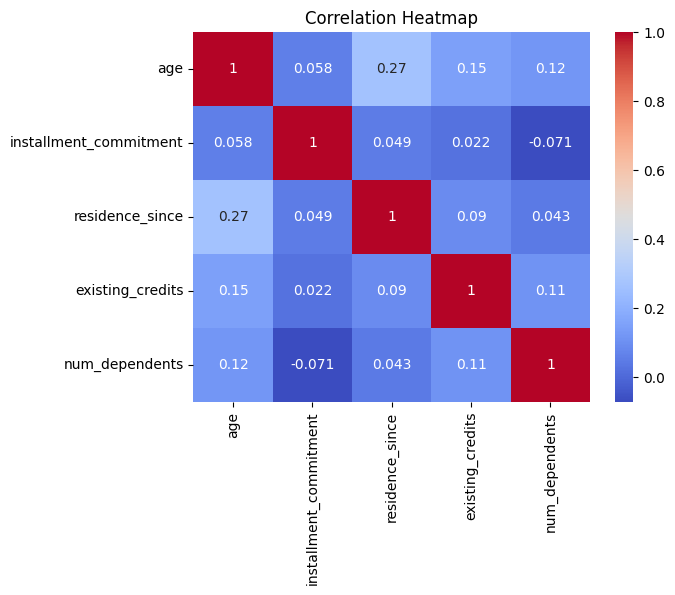

In [ ]:
numerical_features = ['age', 'installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']

correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

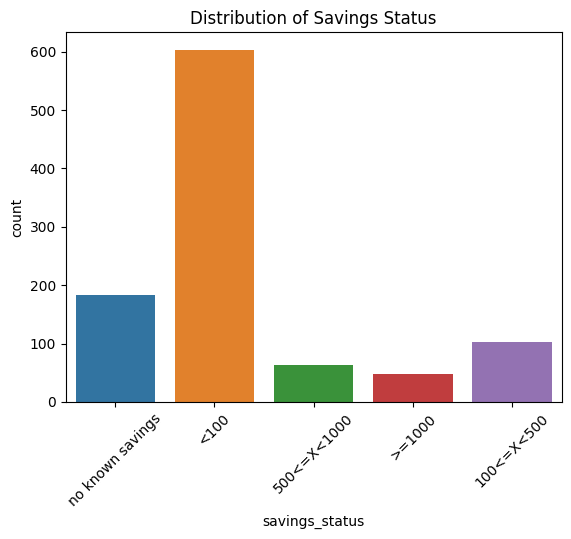

In [ ]:
sns.countplot(data=df, x='savings_status')
plt.xticks(rotation=45)
plt.title("Distribution of Savings Status")
plt.show()

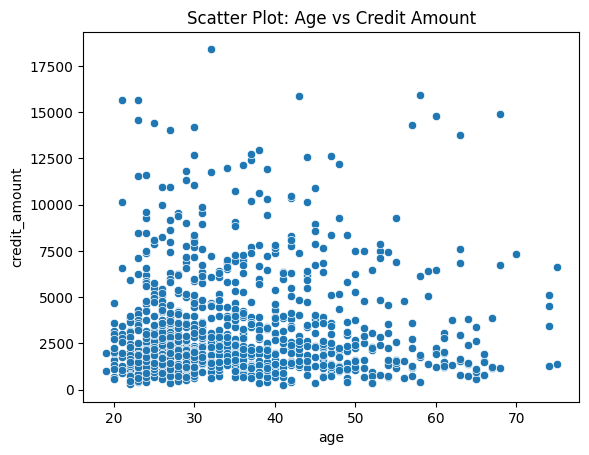

In [ ]:
sns.scatterplot(data=df, x='age', y='credit_amount')
plt.title("Scatter Plot: Age vs Credit Amount")
plt.show()

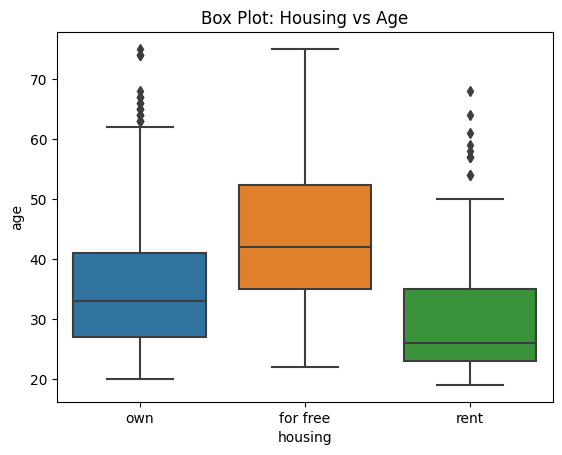

In [ ]:
sns.boxplot(data=df, x='housing', y='age')
plt.title("Box Plot: Housing vs Age")
plt.show()

In [ ]:
file_path = 'credit_data.csv'

# Save the DataFrame as a CSV file
df.to_csv(file_path, index=False)